In [40]:
from ultralytics import YOLO

yolo = YOLO('yolov8l.pt')  # initialize

In [41]:
from PIL import Image   

img = Image.open('./misc/attention/frame_3.png')
yolo_res = yolo(img)
yolo_res


0: 480x640 2 persons, 1 wine glass, 1 fork, 1 knife, 69.4ms
Speed: 3.3ms preprocess, 69.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

(0.467822790145874, 0.35816141963005066) (367.9750061035156, 594.98046875)
(390.2875671386719, 25.901565551757812) (794.0, 583.6002807617188)
(385.643798828125, 318.7583923339844) (542.111328125, 553.8470458984375)
(316.1524658203125, 572.9837646484375) (444.4688415527344, 595.7695922851562)
(0.2978552579879761, 576.2332153320312) (32.94023132324219, 595.6911010742188)


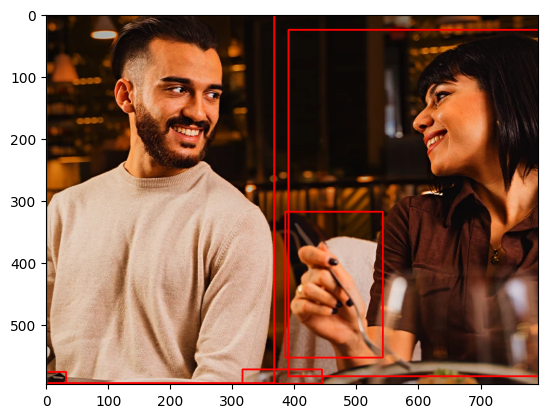

In [42]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./misc/attention/frame_3.png')
for box in yolo_res[0].boxes:
    print((box.xyxy[0][0].item(), box.xyxy[0][1].item()), (box.xyxy[0][2].item(), box.xyxy[0][3].item()))
    cv2.rectangle(img, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item())), (int(box.xyxy[0][2].item()), int(box.xyxy[0][3].item())), (0, 0, 255), 2)

plt.imshow(img[:,:,::-1])

In [43]:
boxes = [r for r in yolo_res[0].boxes if r.cls == 0]
boxes

[ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([0.], device='cuda:0')
 conf: tensor([0.9624], device='cuda:0')
 data: tensor([[4.6782e-01, 3.5816e-01, 3.6798e+02, 5.9498e+02, 9.6237e-01, 0.0000e+00]], device='cuda:0')
 id: None
 is_track: False
 orig_shape: (596, 794)
 shape: torch.Size([1, 6])
 xywh: tensor([[184.2214, 297.6693, 367.5072, 594.6223]], device='cuda:0')
 xywhn: tensor([[0.2320, 0.4994, 0.4629, 0.9977]], device='cuda:0')
 xyxy: tensor([[4.6782e-01, 3.5816e-01, 3.6798e+02, 5.9498e+02]], device='cuda:0')
 xyxyn: tensor([[5.8920e-04, 6.0094e-04, 4.6344e-01, 9.9829e-01]], device='cuda:0'),
 ultralytics.engine.results.Boxes object with attributes:
 
 cls: tensor([0.], device='cuda:0')
 conf: tensor([0.9188], device='cuda:0')
 data: tensor([[390.2876,  25.9016, 794.0000, 583.6003,   0.9188,   0.0000]], device='cuda:0')
 id: None
 is_track: False
 orig_shape: (596, 794)
 shape: torch.Size([1, 6])
 xywh: tensor([[592.1438, 304.7509, 403.7124, 557.6987]],

In [44]:
import os
import torch
import matplotlib.pyplot as plt
from transformers import GitForCausalLM, GitProcessor, GitConfig, GitVisionConfig
from PIL import Image
from pydantic import BaseModel, ConfigDict

In [45]:
MODEL = 'microsoft/git-large-r-textcaps'

In [46]:
processor = GitProcessor.from_pretrained(MODEL)
git_model = GitForCausalLM.from_pretrained(MODEL)
config = GitConfig.from_pretrained(MODEL)
vision_config = GitVisionConfig.from_pretrained(MODEL)

In [47]:
patch_size = vision_config.patch_size
num_heads = config.num_attention_heads
num_layers = config.num_hidden_layers
image_size = vision_config.image_size
num_tokens = 2 + (image_size // patch_size) ** 2
num_patches = (image_size // patch_size) ** 2

print("Patch size:\t\t", patch_size)
print("Image size:\t\t", image_size)
print("Number of heads:\t", num_heads)
print("Number of layers:\t", num_layers)
print("Number of tokens:\t", num_tokens)
print("Number of patches:\t", num_patches)

Patch size:		 14
Image size:		 224
Number of heads:	 12
Number of layers:	 6
Number of tokens:	 258
Number of patches:	 256


In [93]:
box = boxes[1]
box

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9188], device='cuda:0')
data: tensor([[390.2876,  25.9016, 794.0000, 583.6003,   0.9188,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (596, 794)
shape: torch.Size([1, 6])
xywh: tensor([[592.1438, 304.7509, 403.7124, 557.6987]], device='cuda:0')
xywhn: tensor([[0.7458, 0.5113, 0.5085, 0.9357]], device='cuda:0')
xyxy: tensor([[390.2876,  25.9016, 794.0000, 583.6003]], device='cuda:0')
xyxyn: tensor([[0.4915, 0.0435, 1.0000, 0.9792]], device='cuda:0')

In [94]:
bbox_conv = torch.nn.Conv2d(1, 1, kernel_size=patch_size, stride=patch_size, padding=0, bias=False)
bbox_conv.weight.data.fill_(1 / (patch_size ** 2))

def get_bbox_mask(xyxyn, size=224):
    mask = torch.zeros((1, 1, size, size))
    for bbox in xyxyn:
        x, y, x_2, y_2 = bbox
        x = int(size * x)
        y = int(size * y)
        x_2 = int(size * x_2)
        y_2 = int(size * y_2)
        
        mask[:, :, y:y_2, x:x_2] = 1
    
    return mask
       
    
bbox_patch = bbox_conv(get_bbox_mask(box.xyxyn, size=image_size))
bbox_patch = bbox_patch.squeeze(0).squeeze(0).flatten()
bbox_patch

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0510, 0.3571, 0.3571, 0.3571, 0.3571, 0.3571, 0.3571, 0.3571, 0.3316, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1429, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9286, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1429, 1.0000, 

In [95]:
class CaptionOutput(BaseModel):
    """Stores the output of captioning an image."""

    image_paths: list[str]
    caption_tokens: list[list[str]]
    caption_text: list[str]
    attention_masks: list[torch.Tensor]

    model_config: ConfigDict = ConfigDict(
        # Allow tensors
        arbitrary_types_allowed=True
    )


def average_attention_weights(
    attention_masks: tuple[tuple[torch.Tensor]],
    patch_size: int = patch_size,
    image_size: int = image_size,
    num_heads: int = num_heads,
    num_layers: int = num_layers,
) -> torch.Tensor:
    """Averages the attention masks across all heads and layers."""

    assert len(attention_masks) == num_layers, f"{len(attention_masks)} != {num_layers}"
    assert (
        attention_masks[0].shape[1] == num_heads
    ), f"{len(attention_masks[0][1])} != {num_heads}"

    num_tokens = 2 + (image_size // patch_size) ** 2
    attention = torch.zeros(num_tokens, num_tokens)
    for layer in range(num_layers):
        interattention = torch.zeros(num_tokens, num_tokens)
        for head in range(num_heads):
            interattention += attention_masks[layer][0][head][:num_tokens, :num_tokens]

        attention += interattention / num_heads
    attention /= num_layers

    return attention

def caption_image_files(
    image_paths: os.PathLike | list[os.PathLike],
    model: GitForCausalLM | str = "microsoft/git-large-r-textcaps",
    processor: GitProcessor | None = processor,
    batch_size: int = 1,
) -> CaptionOutput:
    """Generates captions for a list of image files."""

    if isinstance(model, str):
        model = GitForCausalLM.from_pretrained(model)

    if processor is None:
        processor = GitProcessor.from_pretrained(model)

    if not isinstance(image_paths, list):
        image_paths = [image_paths]

    outputs = CaptionOutput(
        caption_tokens=[],
        caption_text=[],
        attention_masks=[],
        image_paths=[],
    )

    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i : i + batch_size]
        batch = [Image.open(path).convert("RGB") for path in batch_paths]

        inputs = processor(images=batch, return_tensors="pt")
        outputs_ = model.generate(
            pixel_values=inputs["pixel_values"],
            output_attentions=True,
            output_hidden_states=True,
            return_dict_in_generate=True,
        )

        outputs.caption_tokens.extend(outputs_.sequences.tolist())
        outputs.caption_text.extend(processor.batch_decode(outputs_.sequences.tolist()))
        outputs.attention_masks.extend(outputs_.attentions)
        outputs.image_paths.extend(batch_paths)

    return outputs

In [96]:
outputs = caption_image_files("./misc/attention/frame_3.png")

In [97]:
words = processor.tokenizer.convert_ids_to_tokens(outputs.caption_tokens[0])
words

['[CLS]',
 'a',
 'man',
 'and',
 'a',
 'woman',
 'are',
 'sitting',
 'at',
 'a',
 'table',
 'with',
 'a',
 'plate',
 'of',
 'food',
 '.',
 '[SEP]']

In [98]:
man = words[2]
woman = words[5]
man, woman

('man', 'woman')

tensor(0.0029, grad_fn=<SelectBackward0>) tensor(0.0021, grad_fn=<SelectBackward0>)


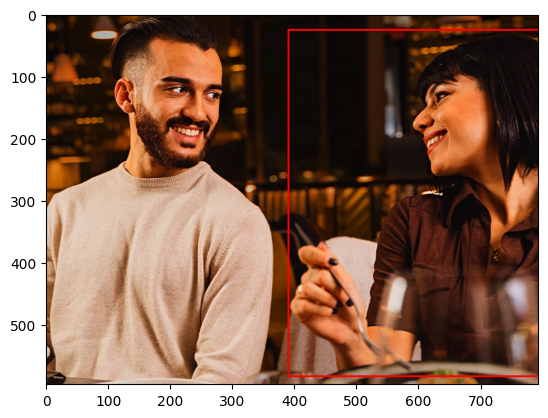

In [100]:
probs = torch.zeros(len(words[:-1]))
for i, word in enumerate(words[:-1]):
    avg = average_attention_weights(outputs.attention_masks[i])
    att = avg[-1, :num_patches]
    
    probs[i] = ((att * bbox_patch) ** 2).sum()
[words[i] for i in probs.argsort().tolist()[::-1]]

img = cv2.imread('./misc/attention/frame_3.png')
cv2.rectangle(img, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item())), (int(box.xyxy[0][2].item()), int(box.xyxy[0][3].item())), (0, 0, 255), 2)
plt.imshow(img[:,:,::-1])
print(probs[2], probs[5])

In [92]:
(att * bbox_patch).sum()

tensor(0.2652, grad_fn=<SumBackward0>)